In [1]:
#Import required modules and functions
import pandas
import neattext.functions as nt_func
import numpy
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer



In [2]:
dataframe = pandas.read_csv("dataset/courses.csv")

dataframe.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [3]:
dataframe.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [4]:
#Simplified course names
dataframe["Simplified_Title"] = dataframe["course_title"].apply(nt_func.remove_stopwords)
dataframe.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Simplified_Title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,Complete GST Course & Certification - Grow Pra...
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,Financial Modeling Business Analysts Consultants
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,Beginner Pro - Financial Analysis Excel 2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,Maximize Profits Trading Options


In [38]:
#Simplified course names
dataframe["Simplified_Title"] = dataframe["Simplified_Title"].apply(nt_func.remove_special_characters)
dataframe["course_title"].str.lower()

0                      ultimate investment banking course
1       complete gst course & certification - grow you...
2       financial modeling for business analysts and c...
3       beginner to pro - financial analysis in excel ...
4            how to maximize your profits trading options
                              ...                        
3678    learn jquery from scratch - master of javascri...
3679    how to design a wordpress website with no codi...
3680                        learn and build using polymer
3681    css animations: create amazing effects on your...
3682    using modx cms to build websites: a beginner's...
Name: course_title, Length: 3683, dtype: object

In [40]:
dataframe[["course_title", "Simplified_Title"]]


,course_title,Simplified_Title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Practice
2,Financial Modeling for Business Analysts and C...,Financial Modeling Business Analysts Consultants
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner Pro Financial Analysis Excel 2017
4,How To Maximize Your Profits Trading Options,Maximize Profits Trading Options
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery Scratch Master JavaScript library
3679,How To Design A WordPress Website With No Codi...,Design WordPress Website Coding
3680,Learn and Build using Polymer,Learn Build Polymer
3681,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects Website


In [7]:
#Text Vectorization Process
cvector = CountVectorizer()
cvector_matrix = cvector.fit_transform(dataframe['Simplified_Title'])



In [8]:
dataframe_cv_words = pandas.DataFrame(cvector_matrix.todense(), columns = cvector.get_feature_names_out())

In [9]:
dataframe_cv_words.head()


,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#building cosine similarity matrix
cossim_matrix = cosine_similarity(cvector_matrix)

In [11]:
cossim_matrix

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        1.        ]])

<Axes: >

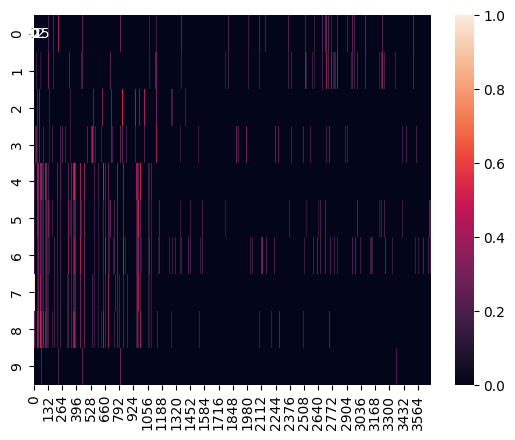

In [12]:
import seaborn
seaborn.heatmap(cossim_matrix[0:10], annot = True)


In [13]:
#Get course id
course_id = pandas.Series(dataframe.index, index=dataframe['course_title']).drop_duplicates()
course_id

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3678
How To Design A WordPress Website With No Coding At All        3679
Learn and Build using Polymer                                  3680
CSS Animations: Create Amazing Effects on Your Website         3681
Using MODX CMS to Build Websites: A Beginner's Guide           3682
Length: 3683, dtype: int64

In [30]:
course_id

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3678
How To Design A WordPress Website With No Coding At All        3679
Learn and Build using Polymer                                  3680
CSS Animations: Create Amazing Effects on Your Website         3681
Using MODX CMS to Build Websites: A Beginner's Guide           3682
Length: 3683, dtype: int64

In [32]:
for i in course_id:
    print(course_id[i])
    




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13160\525497299.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(course_id[i])


In [22]:
sim_index = list(enumerate(cossim_matrix[id]))
sim_index

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.5773502691896258),
 (5, 0.2357022603955159),
 (6, 0.2357022603955159),
 (7, 0.2182178902359924),
 (8, 0.4364357804719848),
 (9, 0.0),
 (10, 0.2357022603955159),
 (11, 0.5773502691896258),
 (12, 0.0),
 (13, 0.2041241452319315),
 (14, 0.408248290463863),
 (15, 0.0),
 (16, 0.0),
 (17, 0.2182178902359924),
 (18, 0.0),
 (19, 0.0),
 (20, 0.3481553119113957),
 (21, 0.2357022603955159),
 (22, 0.2182178902359924),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.2182178902359924),
 (30, 0.408248290463863),
 (31, 0.0),
 (32, 0.0),
 (33, 0.4364357804719848),
 (34, 0.0),
 (35, 0.4364357804719848),
 (36, 0.3481553119113957),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.6546536707079772),
 (44, 0.408248290463863),
 (45, 0.0),
 (46, 0.408248290463863),
 (47, 0.0),
 (48, 0.408248290463863),
 (49, 0.4714045207910318),
 (50, 0.25819888974716115),
 (51, 0.0),
 (52, 0.2182178902359924),
 (5

In [16]:
#Similarity index sorting
sorted_sindex = sorted(sim_index, key=lambda x:x[1],reverse = True)
sorted_sindex

[(3680, 1.0000000000000002),
 (801, 0.5773502691896258),
 (3506, 0.5222329678670936),
 (1723, 0.5163977794943223),
 (2727, 0.5163977794943223),
 (3042, 0.5163977794943223),
 (3046, 0.5163977794943223),
 (3358, 0.5163977794943223),
 (3393, 0.5163977794943223),
 (3484, 0.5163977794943223),
 (1666, 0.4714045207910318),
 (2695, 0.4714045207910318),
 (2967, 0.4714045207910318),
 (3044, 0.4714045207910318),
 (3170, 0.4714045207910318),
 (3303, 0.4714045207910318),
 (3524, 0.4714045207910318),
 (3633, 0.4714045207910318),
 (28, 0.4364357804719848),
 (268, 0.4364357804719848),
 (3153, 0.4364357804719848),
 (3665, 0.4364357804719848),
 (1343, 0.408248290463863),
 (2458, 0.408248290463863),
 (3106, 0.408248290463863),
 (3158, 0.408248290463863),
 (3202, 0.408248290463863),
 (3535, 0.408248290463863),
 (3576, 0.408248290463863),
 (1686, 0.3849001794597505),
 (162, 0.3333333333333334),
 (615, 0.3333333333333334),
 (1006, 0.3333333333333334),
 (1894, 0.3333333333333334),
 (1978, 0.3333333333333334)

In [17]:
#Deleteting first value
sorted_sindex[1:]

[(801, 0.5773502691896258),
 (3506, 0.5222329678670936),
 (1723, 0.5163977794943223),
 (2727, 0.5163977794943223),
 (3042, 0.5163977794943223),
 (3046, 0.5163977794943223),
 (3358, 0.5163977794943223),
 (3393, 0.5163977794943223),
 (3484, 0.5163977794943223),
 (1666, 0.4714045207910318),
 (2695, 0.4714045207910318),
 (2967, 0.4714045207910318),
 (3044, 0.4714045207910318),
 (3170, 0.4714045207910318),
 (3303, 0.4714045207910318),
 (3524, 0.4714045207910318),
 (3633, 0.4714045207910318),
 (28, 0.4364357804719848),
 (268, 0.4364357804719848),
 (3153, 0.4364357804719848),
 (3665, 0.4364357804719848),
 (1343, 0.408248290463863),
 (2458, 0.408248290463863),
 (3106, 0.408248290463863),
 (3158, 0.408248290463863),
 (3202, 0.408248290463863),
 (3535, 0.408248290463863),
 (3576, 0.408248290463863),
 (1686, 0.3849001794597505),
 (162, 0.3333333333333334),
 (615, 0.3333333333333334),
 (1006, 0.3333333333333334),
 (1894, 0.3333333333333334),
 (1978, 0.3333333333333334),
 (2080, 0.3333333333333334)

In [31]:
#Picking Final courses to be displayed:
final_courses = [i[0] for i in sorted_sindex[1:]]
final_course_index = [i[1] for i in sorted_sindex[1:]]
final_courses

[801,
 3506,
 1723,
 2727,
 3042,
 3046,
 3358,
 3393,
 3484,
 1666,
 2695,
 2967,
 3044,
 3170,
 3303,
 3524,
 3633,
 28,
 268,
 3153,
 3665,
 1343,
 2458,
 3106,
 3158,
 3202,
 3535,
 3576,
 1686,
 162,
 615,
 1006,
 1894,
 1978,
 2080,
 2122,
 2425,
 2426,
 2495,
 2619,
 2623,
 2625,
 2662,
 2775,
 2993,
 3010,
 3014,
 3028,
 3105,
 3164,
 3171,
 3251,
 3256,
 3325,
 3550,
 3582,
 56,
 179,
 254,
 273,
 292,
 312,
 357,
 484,
 499,
 533,
 663,
 716,
 754,
 759,
 775,
 890,
 894,
 1027,
 1028,
 1194,
 1198,
 1297,
 1318,
 1345,
 1406,
 1447,
 1587,
 1595,
 1652,
 1765,
 1810,
 1812,
 1821,
 1874,
 2047,
 2169,
 2176,
 2273,
 2274,
 2290,
 2307,
 2314,
 2352,
 2360,
 2373,
 2423,
 2541,
 2599,
 2624,
 2734,
 2774,
 2781,
 2794,
 2830,
 2832,
 2835,
 2861,
 2863,
 2884,
 2888,
 2894,
 2907,
 2942,
 2957,
 2980,
 2995,
 3007,
 3029,
 3072,
 3079,
 3161,
 3189,
 3241,
 3247,
 3296,
 3308,
 3361,
 3386,
 3400,
 3418,
 3452,
 3493,
 3579,
 3613,
 3641,
 3666,
 2066,
 74,
 106,
 128,
 165,


In [23]:
#result to be displayed
result = dataframe['course_title'].iloc[final_courses]


In [24]:
result

801                                        Learn about it
3506    Learn to build 20 websites and build 14 iOS9 a...
1723          Learn Photo Manipulation - Build 3 projects
2727      Learn to Build Websites using Twitter Bootstrap
3042                   Learn to Build Web Apps using D3JS
                              ...                        
3672    The Fastest Way to Create a Website Using Godaddy
3673                               A how to guide in HTML
3674                    Building Better APIs with GraphQL
3679    How To Design A WordPress Website With No Codi...
3681    CSS Animations: Create Amazing Effects on Your...
Name: course_title, Length: 3682, dtype: object

In [25]:
result_dataframe = pandas.DataFrame(result)

In [26]:
result_dataframe

,course_title
801,Learn about it
3506,Learn to build 20 websites and build 14 iOS9 a...
1723,Learn Photo Manipulation - Build 3 projects
2727,Learn to Build Websites using Twitter Bootstrap
3042,Learn to Build Web Apps using D3JS
...,...
3672,The Fastest Way to Create a Website Using Godaddy
3673,A how to guide in HTML
3674,Building Better APIs with GraphQL
3679,How To Design A WordPress Website With No Codi...


In [33]:
result_dataframe['similarity'] = final_course_index

In [34]:

result_dataframe

,course_title,similarity
801,Learn about it,0.577350
3506,Learn to build 20 websites and build 14 iOS9 a...,0.522233
1723,Learn Photo Manipulation - Build 3 projects,0.516398
2727,Learn to Build Websites using Twitter Bootstrap,0.516398
3042,Learn to Build Web Apps using D3JS,0.516398
...,...,...
3672,The Fastest Way to Create a Website Using Godaddy,0.000000
3673,A how to guide in HTML,0.000000
3674,Building Better APIs with GraphQL,0.000000
3679,How To Design A WordPress Website With No Codi...,0.000000


NameError: name 'kw_model' is not defined

In [ ]:
|